In [159]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import pyplot
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [220]:
df_2020 = pd.read_csv("C:/Users/Toomas/Desktop/ITMI_Data/Cleaned_datasets_25_64/Yearly/2020_cleaned_weights.csv")

In [221]:
# drop irrelevant columns for analysis
df_2020 = df_2020.drop(columns=['survey_year', 'respondent_id', 'age','bmi','bmi_four_groups','bmi_two_groups_split30', 'weights'])

In [222]:
# create dummy variables
# first change values from numeric to nominal for readable dummy labels

df_2020['gender'] = df_2020['gender'].replace([1,2],['MALE','FEMALE'])
df_2020['age_group'] = df_2020['age_group'].replace([1,2,3,4],['25_34','35_44','45_54','55_64'])
df_2020['ethnicity_estonian_nonestonian'] = df_2020['ethnicity_estonian_nonestonian'].replace([1,2],['ESTONIAN','NON_ESTONIAN'])
df_2020['education'] = df_2020['education'].replace([1,2,3,4],['PRIMARY_BASIC','SECONARY','SECONDARY_VOCATIONAL','HIGHER'])
df_2020['income_per_household_member'] = df_2020['income_per_household_member'].replace([1,2,3,4],['QUARTILE_1','QUARTILE_2','QUARTILE_3','QUARTILE_4'])
df_2020['chronic_disease'] = df_2020['chronic_disease'].replace([1,2],['YES','NO'])
df_2020['smoking_history'] = df_2020['smoking_history'].replace([1,2,3,4],['NEVER','FORMERLY','SELDOM','DAILY'])
df_2020['alcohol_standard_units_consumption_frequency'] = df_2020['alcohol_standard_units_consumption_frequency'].replace([1,2,3,4,5],['NEVER','<1x_MONTH','1+x_MONTH','1x_WEEK','ALMOST_DAILY'])
df_2020['exercising_frequency'] = df_2020['exercising_frequency'].replace([1,2,3,4,5,6],['NEVER','1x_MONTH','2_3x_MONTH','1x_WEEK','2_3x_WEEK', '4_7X_WEEK'])
df_2020['work_physical_effort_level'] = df_2020['work_physical_effort_level'].replace([1,2,3,4],['LITTLE','SOME','AVERAGE','A_LOT'])


df_dummies = pd.get_dummies(df_2020, columns=['gender', 'age_group', \
                                              'ethnicity_estonian_nonestonian', 'education',\
                                              'income_per_household_member', 'chronic_disease',\
                                              'smoking_history',\
                                              'alcohol_standard_units_consumption_frequency',\
                                              'exercising_frequency',\
                                              'work_physical_effort_level'],drop_first=False)

In [223]:
df_dummies.columns

Index(['bmi_two_groups_split25', 'gender_FEMALE', 'gender_MALE',
       'age_group_25_34', 'age_group_35_44', 'age_group_45_54',
       'age_group_55_64', 'ethnicity_estonian_nonestonian_ESTONIAN',
       'ethnicity_estonian_nonestonian_NON_ESTONIAN', 'education_HIGHER',
       'education_PRIMARY_BASIC', 'education_SECONARY',
       'education_SECONDARY_VOCATIONAL',
       'income_per_household_member_QUARTILE_1',
       'income_per_household_member_QUARTILE_2',
       'income_per_household_member_QUARTILE_3',
       'income_per_household_member_QUARTILE_4', 'chronic_disease_NO',
       'chronic_disease_YES', 'smoking_history_DAILY',
       'smoking_history_FORMERLY', 'smoking_history_NEVER',
       'smoking_history_SELDOM',
       'alcohol_standard_units_consumption_frequency_1+x_MONTH',
       'alcohol_standard_units_consumption_frequency_1x_WEEK',
       'alcohol_standard_units_consumption_frequency_<1x_MONTH',
       'alcohol_standard_units_consumption_frequency_ALMOST_DAILY',
    

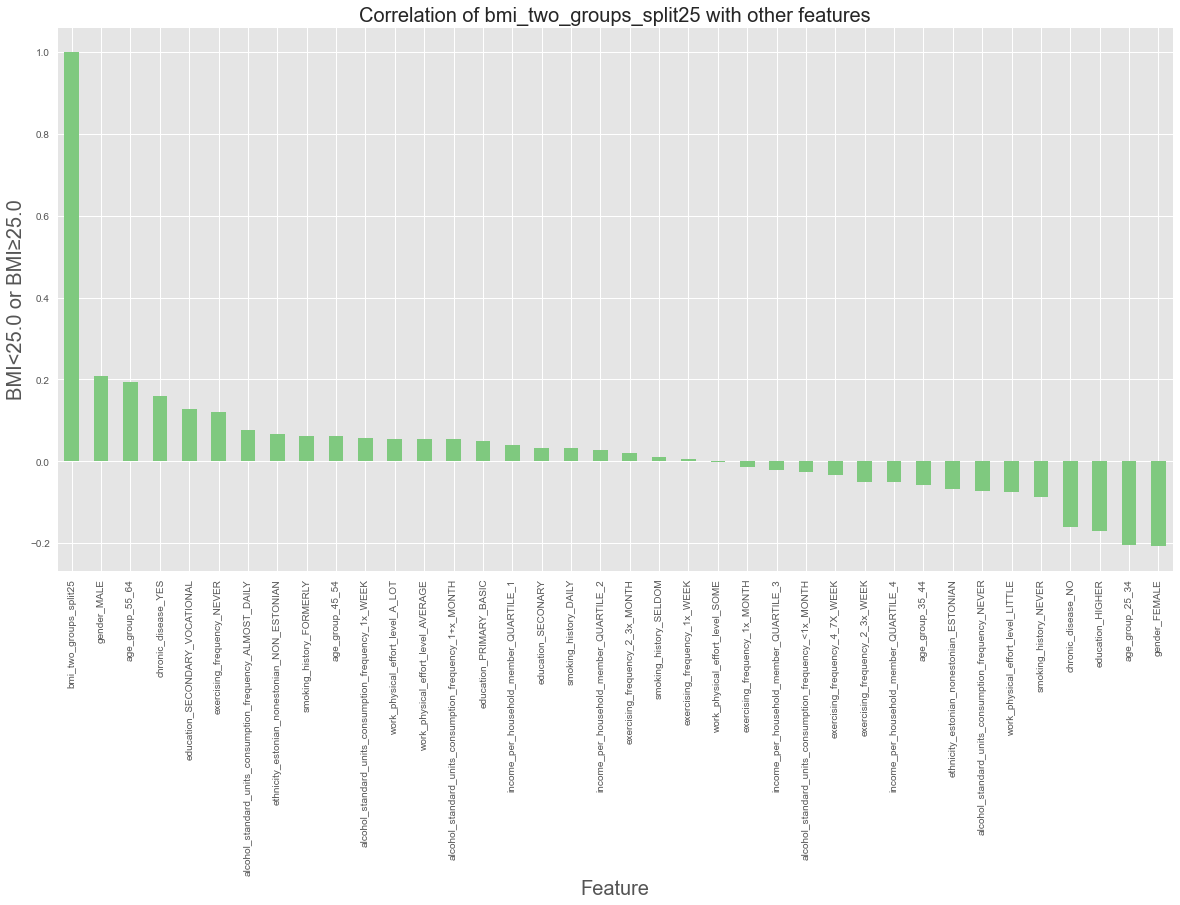

<Figure size 432x288 with 0 Axes>

In [224]:
## correlation graph
plt.style.use('ggplot')
plt.figure(figsize = (20,10))

# get a color map

my_cmap = cm.get_cmap('Accent')

# Get correlation of bmi_two_groups_split25 with other variables

df_dummies.corr()['bmi_two_groups_split25'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x and 

plt.title('Correlation of bmi_two_groups_split25 with other features', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('BMI<25.0 or BMI≥25.0', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/correlations.pdf")

In [225]:
# scaling all variables to the range of 0 to 1 before data learning process

y = df_dummies['bmi_two_groups_split25'].values
X = df_dummies.drop(columns = ['bmi_two_groups_split25'])

features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [226]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [227]:
#====================================
# Logistic regression model training
#====================================

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [228]:
#print out the hyperparameters of the trained model
model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [229]:
# Logistic regression model prediction and metrics
y_pred = model_LR.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.63
Precision: 	 0.61
Recall: 	 0.55
F1-score: 	 0.58


In [230]:
# LR model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1 = LogisticRegression()
scores1 = cross_val_score(model_LR_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.66
Precision: 0.64
Recall: 0.57
F1 Score: 0.60


Feature: 0, Score: -0.41181
Feature: 1, Score: 0.41172
Feature: 2, Score: -0.77011
Feature: 3, Score: -0.19305
Feature: 4, Score: 0.16716
Feature: 5, Score: 0.79591
Feature: 6, Score: -0.13397
Feature: 7, Score: 0.13388
Feature: 8, Score: -0.40018
Feature: 9, Score: 0.19983
Feature: 10, Score: -0.04883
Feature: 11, Score: 0.24908
Feature: 12, Score: -0.12538
Feature: 13, Score: 0.06016
Feature: 14, Score: 0.04205
Feature: 15, Score: 0.02307
Feature: 16, Score: -0.19121
Feature: 17, Score: 0.19111
Feature: 18, Score: -0.26898
Feature: 19, Score: 0.17599
Feature: 20, Score: 0.02479
Feature: 21, Score: 0.06811
Feature: 22, Score: 0.15714
Feature: 23, Score: -0.13319
Feature: 24, Score: 0.00032
Feature: 25, Score: 0.26167
Feature: 26, Score: -0.28602
Feature: 27, Score: -0.09173
Feature: 28, Score: 0.01613
Feature: 29, Score: 0.18825
Feature: 30, Score: -0.14468
Feature: 31, Score: -0.20232
Feature: 32, Score: 0.23425
Feature: 33, Score: 0.00357
Feature: 34, Score: -0.27113
Feature: 35, Sc

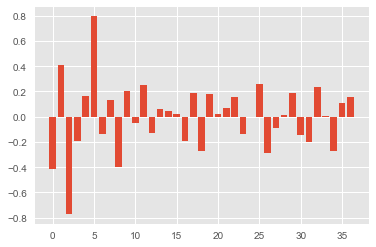

In [231]:
# get importance of features in LR model
importance = model_LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


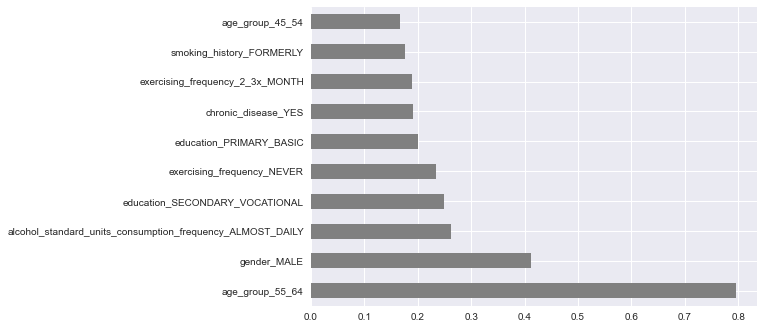

In [291]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in LR model 

weights = pd.Series(model_LR.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI25.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


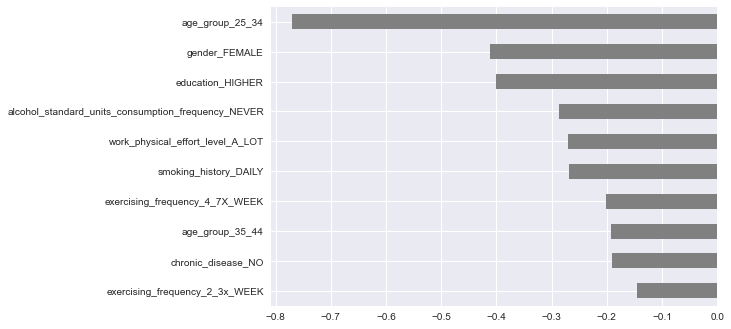

In [292]:
# the most negative impact / LR model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI25.pdf", bbox_inches='tight')

In [234]:
# roc curve for LR model

pred_prob1 = model_LR.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [235]:
# computing auc score for LR
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)


0.6831467764971602


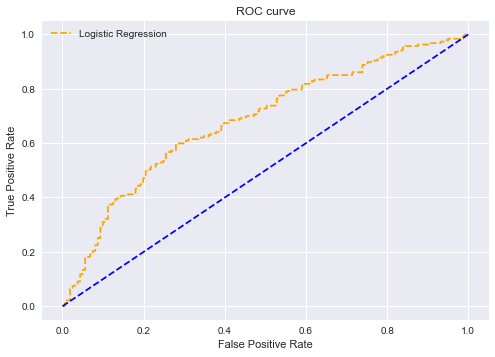

In [236]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI25.pdf")
plt.show();

In [311]:
#====================================
# Random Forest model training
#====================================

model_RF = RandomForestClassifier()

model_RF.fit(X_train, y_train)


RandomForestClassifier()

In [312]:
#print out the hyperparameters of the trained model
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [313]:
# Random forest model prediction and metrics

y_pred = model_RF.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.60
Precision: 	 0.57
Recall: 	 0.52
F1-score: 	 0.54


In [314]:
# RF model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1 = RandomForestClassifier()
scores1 = cross_val_score(model_RF_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.63
Precision: 0.60
Recall: 0.54
F1 Score: 0.57


Feature: 0, Score: 0.07864
Feature: 1, Score: 0.09205
Feature: 2, Score: 0.10016
Feature: 3, Score: 0.02793
Feature: 4, Score: 0.02209
Feature: 5, Score: 0.10229
Feature: 6, Score: 0.01983
Feature: 7, Score: 0.01864
Feature: 8, Score: 0.05385
Feature: 9, Score: 0.01718
Feature: 10, Score: 0.01337
Feature: 11, Score: 0.02985
Feature: 12, Score: 0.01679
Feature: 13, Score: 0.01559
Feature: 14, Score: 0.01456
Feature: 15, Score: 0.01504
Feature: 16, Score: 0.04603
Feature: 17, Score: 0.04128
Feature: 18, Score: 0.01573
Feature: 19, Score: 0.01790
Feature: 20, Score: 0.01634
Feature: 21, Score: 0.01121
Feature: 22, Score: 0.01343
Feature: 23, Score: 0.00845
Feature: 24, Score: 0.01304
Feature: 25, Score: 0.01258
Feature: 26, Score: 0.02271
Feature: 27, Score: 0.01338
Feature: 28, Score: 0.01193
Feature: 29, Score: 0.01308
Feature: 30, Score: 0.01567
Feature: 31, Score: 0.01355
Feature: 32, Score: 0.01959
Feature: 33, Score: 0.01089
Feature: 34, Score: 0.01327
Feature: 35, Score: 0.01508
Fe

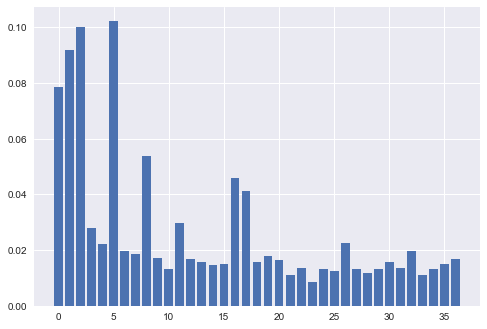

In [241]:
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


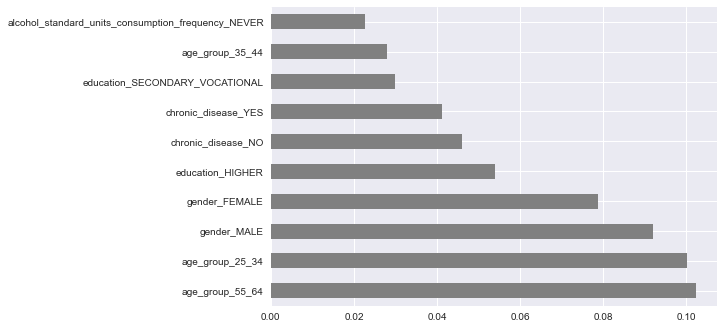

In [294]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in RF model 

weights = pd.Series(model_RF.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI25.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


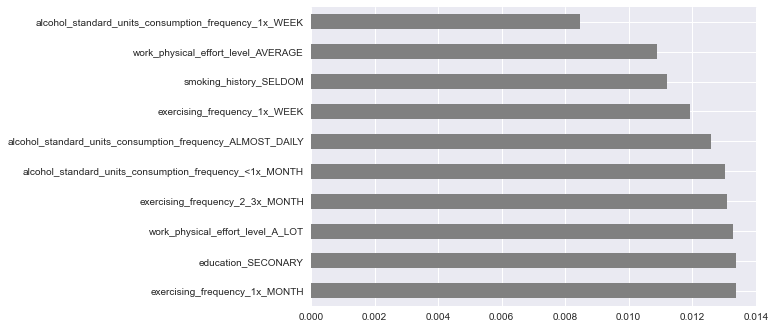

In [295]:
# the most negative impact / RF model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI25.pdf",bbox_inches='tight')

In [244]:
# roc curve for RF model

pred_prob2 = model_RF.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [245]:
# computing auc score for RF
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6762048692994984


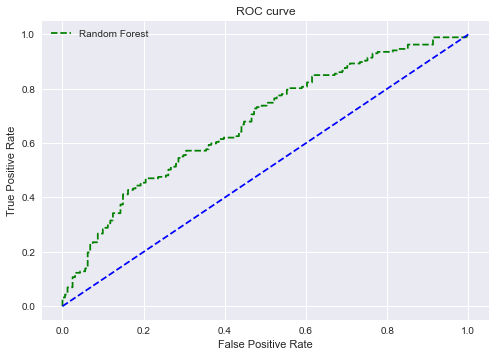

In [246]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI25.pdf")
plt.show();

In [247]:
#====================================
# SVM model training
#====================================

model_SVM=SVC(probability = True, kernel ='linear')
model_SVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [248]:
#print out the hyperparameters of the trained model
model_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [249]:
# SVM model prediction and metrics

y_pred = model_SVM.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))


SVM model metrics:
Accuracy: 0.63
Precision: 	 0.60
Recall: 	 0.57
F1-score: 	 0.58


In [250]:
# SVM model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1 = SVC(probability = True, kernel ='linear')
scores1 = cross_val_score(model_SVM_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.65
Precision: 0.63
Recall: 0.55
F1 Score: 0.59


AxesSubplot(0.125,0.125;0.775x0.755)


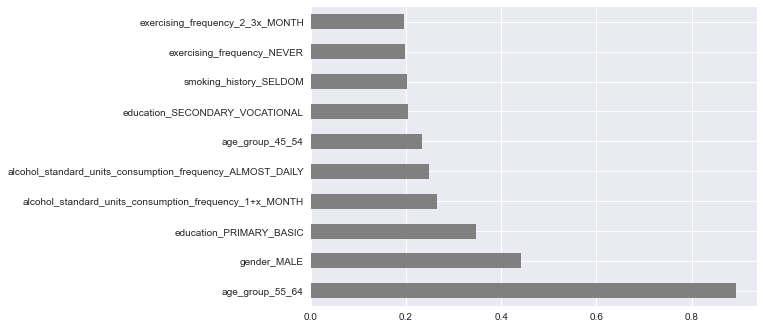

In [296]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in SVM model 

weights = pd.Series(model_SVM.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI25.pdf",bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


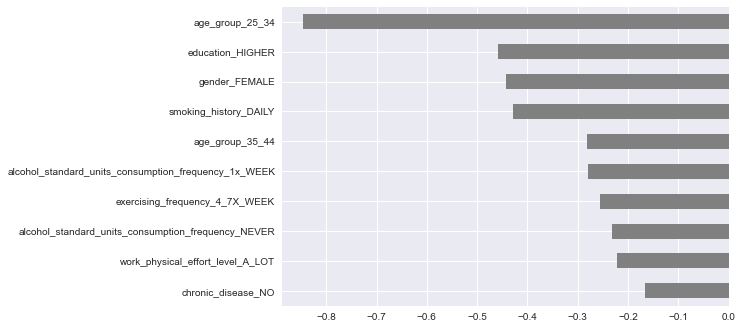

In [297]:
# the most negative impact / SVM model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI25.pdf",bbox_inches='tight')

In [253]:
# roc curve for SVM model

pred_prob3 = model_SVM.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [254]:
# computing auc score for SVM
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.6754243199255987


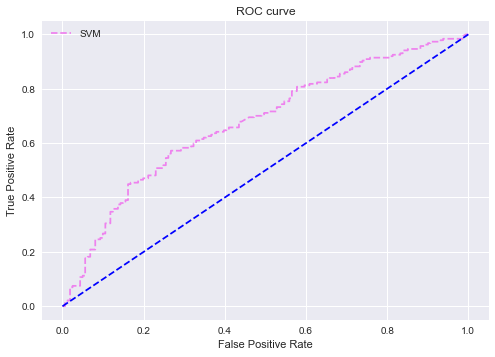

In [255]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI25.pdf")
plt.show();

In [256]:
#====================================
# Decision Tree model training
#====================================

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [257]:
#print out the hyperparameters of the trained model
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [258]:
y_pred = model_DT.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.57
Precision: 	 0.53
Recall: 	 0.53
F1-score: 	 0.53


In [259]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1 = DecisionTreeClassifier()
scores1 = cross_val_score(model_DT_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.57
Precision: 0.53
Recall: 0.55
F1 Score: 0.53


Feature: 0, Score: 0.04497
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.04852
Feature: 3, Score: 0.04048
Feature: 4, Score: 0.01386
Feature: 5, Score: 0.01589
Feature: 6, Score: 0.02865
Feature: 7, Score: 0.02040
Feature: 8, Score: 0.02634
Feature: 9, Score: 0.01480
Feature: 10, Score: 0.02061
Feature: 11, Score: 0.01807
Feature: 12, Score: 0.03112
Feature: 13, Score: 0.04118
Feature: 14, Score: 0.03706
Feature: 15, Score: 0.02266
Feature: 16, Score: 0.02430
Feature: 17, Score: 0.03033
Feature: 18, Score: 0.02629
Feature: 19, Score: 0.03092
Feature: 20, Score: 0.02937
Feature: 21, Score: 0.02367
Feature: 22, Score: 0.02006
Feature: 23, Score: 0.01315
Feature: 24, Score: 0.02546
Feature: 25, Score: 0.01743
Feature: 26, Score: 0.04613
Feature: 27, Score: 0.02459
Feature: 28, Score: 0.02578
Feature: 29, Score: 0.02553
Feature: 30, Score: 0.02301
Feature: 31, Score: 0.05596
Feature: 32, Score: 0.01502
Feature: 33, Score: 0.03636
Feature: 34, Score: 0.01277
Feature: 35, Score: 0.03570
Fe

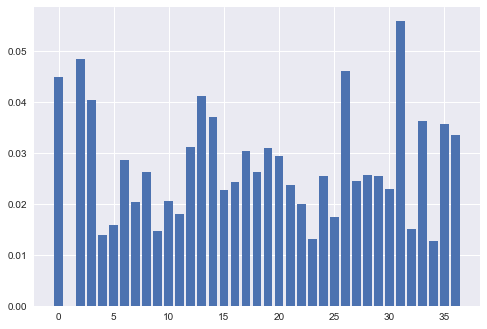

In [260]:
# plot feature important of DT/CART model
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


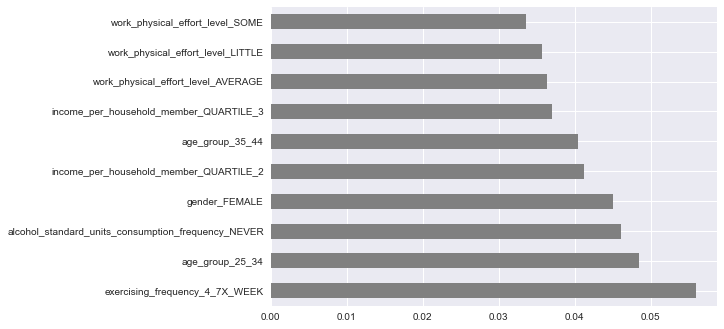

In [299]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in DT model 

weights = pd.Series(model_DT.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI25.pdf",bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


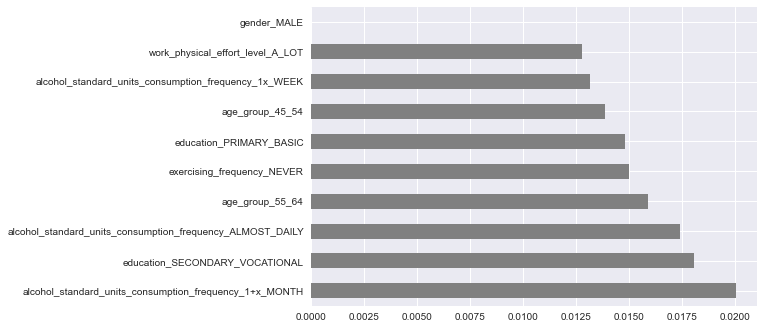

In [300]:
# the most negative impact / SVM model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI25.pdf",bbox_inches='tight')

In [263]:
# roc curve for DT model

pred_prob4 = model_DT.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [264]:
# computing auc score for DT
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5671936758893281


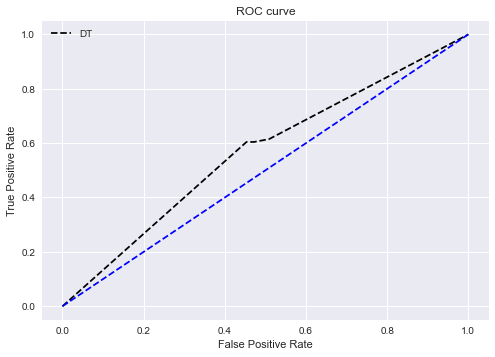

In [265]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI25.pdf")
plt.show();

In [266]:
#====================================
# Gaussian Naive Bayes model training
#====================================

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [267]:
#print out the hyperparameters of the trained model
model_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [268]:
y_pred = model_NB.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.66
Precision: 	 0.62
Recall: 	 0.69
F1-score: 	 0.65


In [269]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1 = GaussianNB()
scores1 = cross_val_score(model_NB_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.63
Precision: 0.57
Recall: 0.69
F1 Score: 0.63


In [270]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(model_NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. alcohol_standard_units_consumption_frequency_1x_WEEK (0.024138)
2. chronic_disease_NO (0.017241)
3. chronic_disease_YES (0.017241)
4. gender_FEMALE (0.016092)
5. gender_MALE (0.016092)
6. education_HIGHER (0.013218)
7. age_group_25_34 (0.012644)
8. age_group_55_64 (0.012069)
9. education_SECONARY (0.011494)
10. alcohol_standard_units_consumption_frequency_ALMOST_DAILY (0.008046)
11. work_physical_effort_level_AVERAGE (0.007471)
12. exercising_frequency_NEVER (0.007471)
13. age_group_35_44 (0.006897)
14. work_physical_effort_level_A_LOT (0.005747)
15. exercising_frequency_2_3x_WEEK (0.004023)
16. income_per_household_member_QUARTILE_4 (0.003448)
17. alcohol_standard_units_consumption_frequency_1+x_MONTH (0.003448)
18. smoking_history_NEVER (0.002874)
19. income_per_household_member_QUARTILE_3 (0.002874)
20. exercising_frequency_2_3x_MONTH (0.002874)
21. age_group_45_54 (0.002874)
22. alcohol_standard_units_consumption_frequency_NEVER (0.002299)
23. smoking_history_SE

AxesSubplot(0.125,0.125;0.775x0.755)


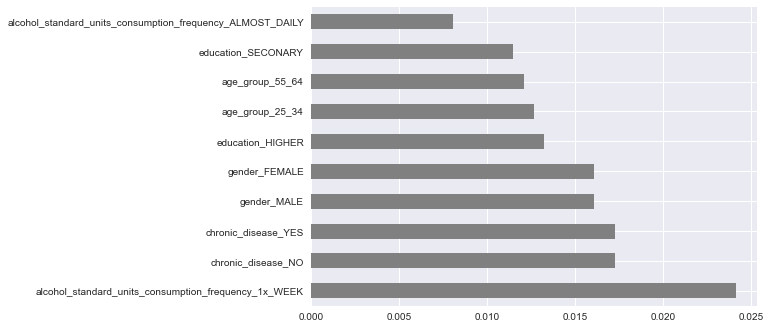

In [301]:
# greatest impact / NB model

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI25.pdf",bbox_inches='tight')


AxesSubplot(0.125,0.125;0.775x0.755)


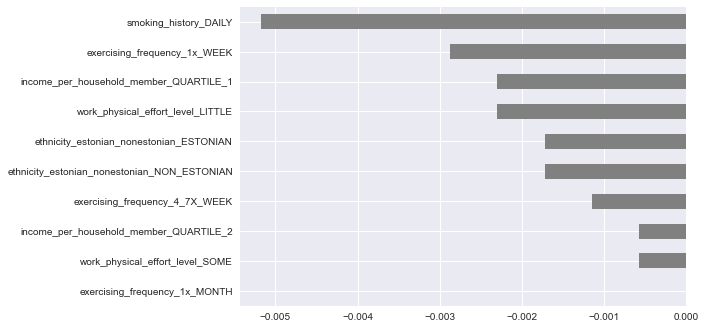

In [302]:
# smalles impact / NB model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI25.pdf",bbox_inches='tight')

In [273]:
# roc curve for NB model

pred_prob5 = model_NB.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [274]:
# computing auc score for NB
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7056000265718936


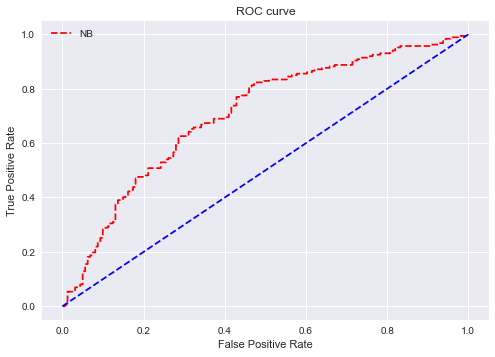

In [275]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI25.pdf")
plt.show();

In [276]:
#====================================
# KNN model training
#====================================

# testing accuracy for k from 1 to 25
k_range = range(1,26)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

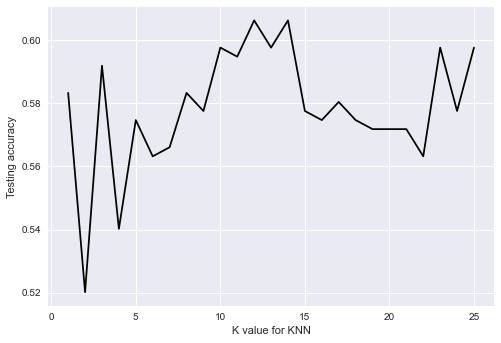

In [277]:
#plotting the relationship between k values and correspondgin testing accuracy

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [278]:
# the final model should have k=12
model_KNN = KNeighborsClassifier(n_neighbors=12)
model_KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=12)

In [279]:
#print out the hyperparameters of the trained model
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 12,
 'p': 2,
 'weights': 'uniform'}

In [280]:
y_pred = model_KNN.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.61
Precision: 	 0.57
Recall: 	 0.65
F1-score: 	 0.60


In [281]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1 = KNeighborsClassifier()
scores1 = cross_val_score(model_KNN_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.59
Precision: 0.55
Recall: 0.54
F1 Score: 0.54


In [282]:
# feature importance is not defined for the KNN classification algorithm and there is no easy way to calucate it

In [283]:
# roc curve for KNN model

pred_prob6 = model_KNN.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [284]:
# computing auc score for KNN
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6293885142990002


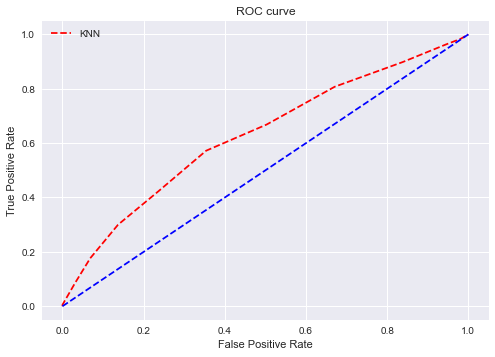

In [285]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI25.pdf")
plt.show();

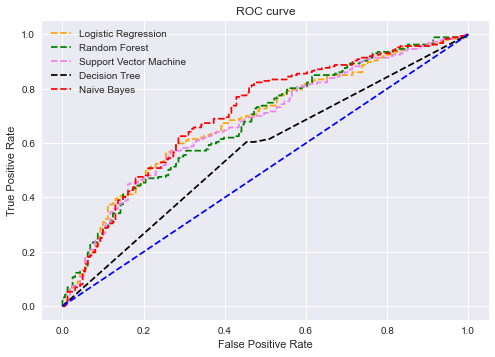

In [286]:
# a plot of roc curves of all 5 models
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all5_BMI25.pdf")
plt.show();

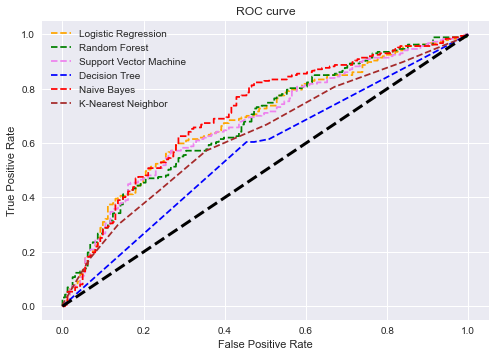

In [287]:
# a plot of roc curves of all 6 models
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='--',color='brown', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BMI25.pdf")
plt.show();

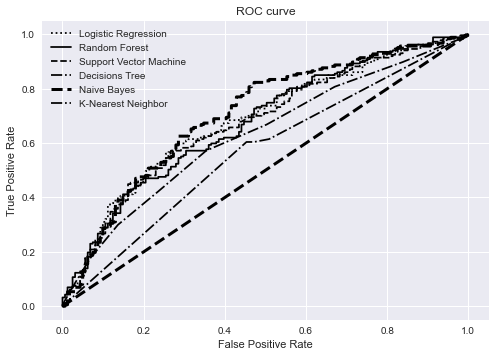

In [288]:
# a plot of roc curves of all 6 models / black and white
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle=':',color = 'black',label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='-',color='black', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='-.',color='black', label='Decisions Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='black', linewidth=3, label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='-.',color='black', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BW_BMI25.pdf")
plt.show();